DATA
* https://www.kaggle.com/mlg-ulb/creditcardfraud


*NOTES* - to be deleted or added in later
* https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/
* https://scikit-learn.org/stable/
* https://matplotlib.org/
* https://www.kaggle.com/mlg-ulb/creditcardfraud

* https://code.visualstudio.com/docs/python/jupyter-support

*AESTHETICS*
* https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/

*ALGORIRTHMS*
* https://scikit-learn.org/stable/modules/naive_bayes.html
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://scikit-learn.org/stable/modules/tree.html#classification

# Credit Card Fraud Detection

## Introduction




We will be exploring and modeling using classification models:
* Naive Bayes
* Decision Trees
* Logistic Regression

After we have fit the data to the models, we will evaluate the differences between each one and determine which one is the better fit or better at predicting credit card fraud.

## Data Exploration

#### Package/Library Import
Make sure to have these packages installed to be able to utilize them and run the following code blocks

* pandas - reading in data
* numpy - array manipulation
* matplotlib - visualization/plotting
* sklearn - modeling

In [7]:
#pip install requirements.txt

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#### Reading

Here, we read in our data using the pandas package and check to see if there are any missing values. We can see that there are no missing values due to the output being "False."

In [9]:
credit_card_data = pd.read_csv("creditcard.csv")
print("missing values:", credit_card_data.isnull().values.any())
print(credit_card_data.head())

missing values: False
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V2

Looking at the data, we can see there is an extreneous column, *Time*, that we do not need, so we can "drop" it to make it easier to split.

In [10]:
credit_card_data.drop('Time', axis = 1, inplace = True)
print(credit_card_data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [11]:
total_cases = len(credit_card_data)
non_fraud = len(credit_card_data[credit_card_data.Class == 0])
fraud = len(credit_card_data[credit_card_data.Class == 1])

print("Total cases: ", total_cases)
print("Fraud: ", fraud)
print("Non-fraud: ", non_fraud)

Total cases:  284807
Fraud:  492
Non-fraud:  284315


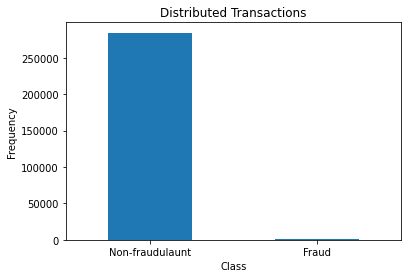

In [12]:
count_classes = pd.value_counts(cc['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Non-fraudulaunt', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

From looking at the graph and the output before, it is clear that the data is unbalanced and there is a greater amount of normal, non-fraudalant transactions in comparison to fraudalant ones. This can cause problems for when we begin modeling.

## Splitting the Data

## Future Exploration